# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Carga de datos

In [3]:
raw_data = pd.read_csv('./ladata2.csv')

In [4]:
raw_data.shape

(1569, 10)

In [5]:
raw_data.sample(5)

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
1385,1385,401,304,104,2,3.5,1.13,8.22,0,63.0
919,919,426,285,100,5,4.0,3.29,7.41,1,92.0
759,759,69,318,108,3,3.5,4.00,9.22,1,68.0
508,508,314,301,112,3,3.5,3.00,8.04,0,67.0
1466,1466,41,310,74,2,2.9,2.87,8.05,1,47.5


# Descripcion de los datos

In [6]:
raw_data.dtypes

Unnamed: 0             int64
Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admission Points     float64
dtype: object

In [7]:
raw_data.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,784.000000,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,453.075601,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,0.000000,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,392.000000,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,784.000000,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,1176.000000,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,1568.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


# Limpieza de datos

In [8]:

# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar

#raw_data = raw_data.drop(['Unnamed: 0', 'Serial No.'], axis = 1)
#(raw_data.isnull().sum() / raw_data.shape[0]).sort_values(ascending = False)
#mean = round(raw_data['Admission Points'].mean(),2)
#raw_data['Admission Points'].fillna(value=mean, inplace=True)
#raw_data.describe()
selected_cols = ['GRE Score','TOEFL Scor','University Rating','SOP', 'LOR','CGPA','Research','Admission Points']
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
      ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))]
raw_data.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1504.000000
mean,784.000000,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726,66.744328
std,453.075601,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242,19.253029
min,0.000000,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000,34.000000
25%,392.000000,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000,48.000000
50%,784.000000,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000,67.000000
75%,1176.000000,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000,84.000000
max,1568.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,145.500000


In [9]:
(raw_data.isnull().sum() / raw_data.shape[0]).sort_values(ascending = False)

Admission Points     0.041428
Unnamed: 0           0.000000
Serial No.           0.000000
GRE Score            0.000000
TOEFL Score          0.000000
University Rating    0.000000
SOP                  0.000000
LOR                  0.000000
CGPA                 0.000000
Research             0.000000
dtype: float64

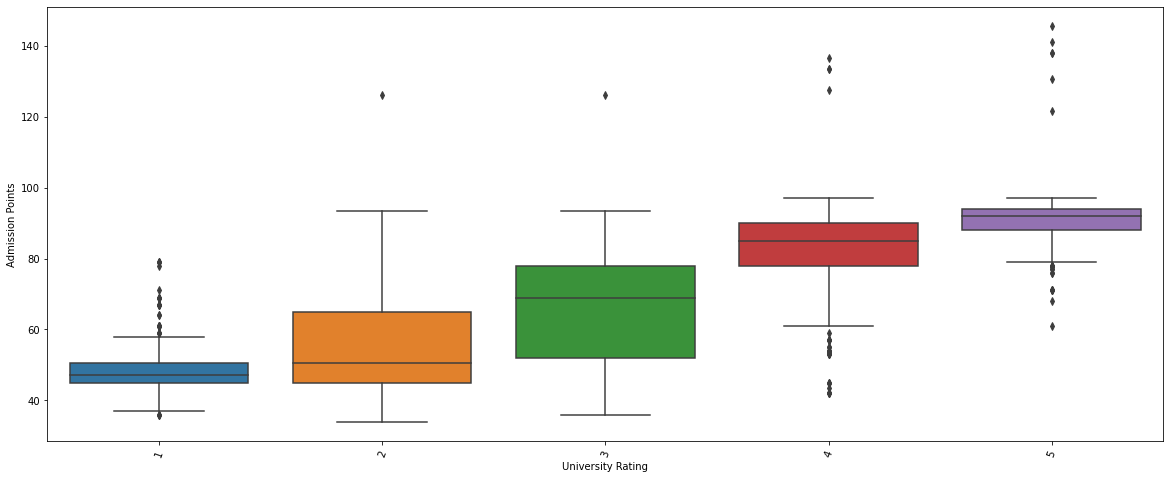

In [10]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x = 'University Rating', y = 'Admission Points', data = raw_data)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70) 
plt.show()

## Busqueda de relacion entre atributos

In [11]:
#Primero se definen las variables independientes:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
data = raw_data
obj = 'Admission Points'

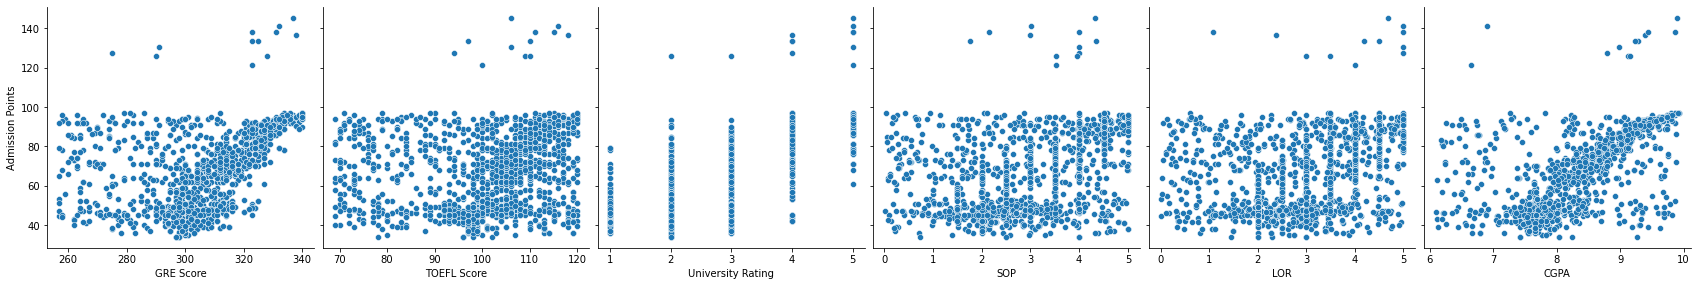

In [12]:
data = pd.DataFrame(data, columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admission Points'])
sns.pairplot(data.sample(1569), height = 4, y_vars = obj, x_vars = features, kind = 'scatter')

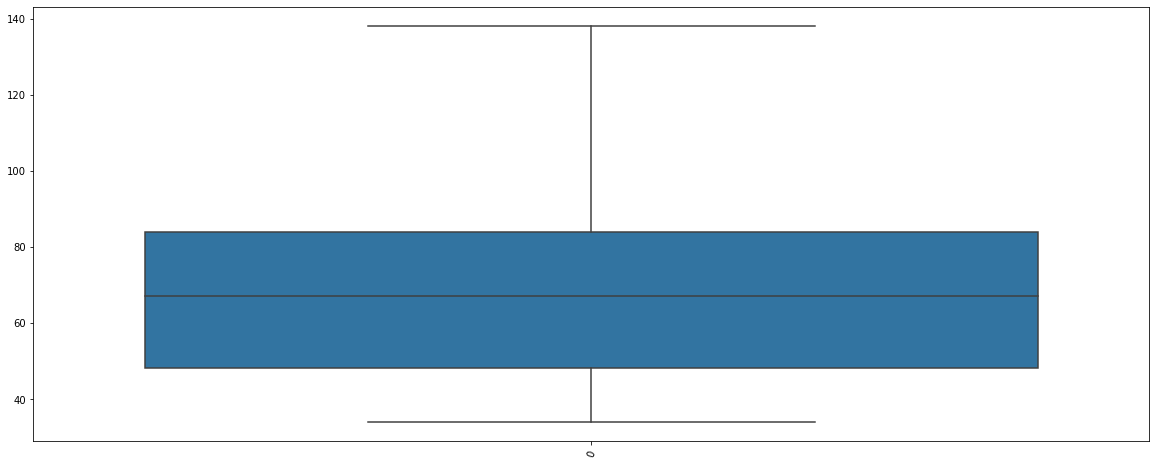

In [13]:
#Removemos los outliers de la variable objetivo
Q1 = data[obj].quantile(0.25)
Q3 = data[obj].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data[obj] >= Q1 - 1.5 * IQR) & (data[obj] <= Q3 + 1.5 *IQR)
data = data.loc[filter]  
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(data = data[obj])
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70) 
plt.show()

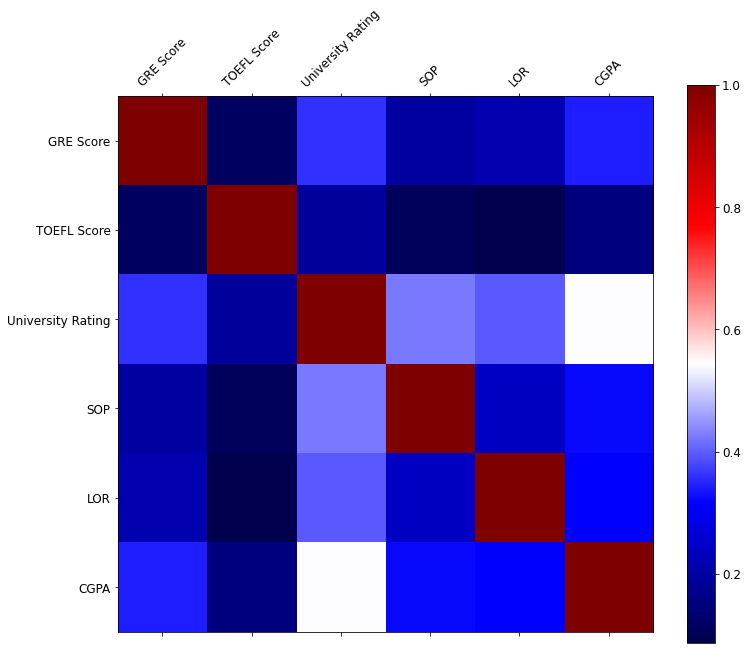

In [14]:
f = plt.figure(figsize = (12, 10))
plt.matshow(data[features].corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(len(features)), features, fontsize = 12, rotation = 45)
plt.yticks(range(len(features)), features, fontsize = 12)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize = 12)

# Regresion con pipeline

In [15]:
#selected_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
selected_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
raw_data = raw_data.fillna(-1)
print(raw_data.isnull().sum()) 
pre = [('initial',ColumnTransformer([("selector", 'passthrough', selected_cols)])),
      ('imputer', SimpleImputer(missing_values=-1 , strategy='median')),
      ('scaler', MinMaxScaler())]

obj = 'Admission Points'

Unnamed: 0           0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Points     0
dtype: int64


In [16]:
# Modelo
model = [('model', LinearRegression())]

In [17]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [18]:
# Extraemos las variables explicativas y objetivo para entrenar

X = raw_data.drop(obj, axis = 1)
y = raw_data[obj]

In [19]:
X.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,784.000000,239.022945,307.669216,101.632250,2.873805,2.980848,3.013907,8.342231,0.469726
std,453.075601,149.802641,17.857559,12.386238,1.245147,1.234802,1.214377,0.812729,0.499242
min,0.000000,1.000000,257.000000,69.000000,1.000000,0.020000,0.000000,6.100000,0.000000
25%,392.000000,94.000000,298.000000,96.000000,2.000000,2.000000,2.050000,7.750000,0.000000
50%,784.000000,236.000000,309.000000,104.000000,3.000000,3.000000,3.000000,8.330000,0.000000
75%,1176.000000,377.000000,322.000000,111.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,1568.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [20]:
pipeline = pipeline.fit(X,y)

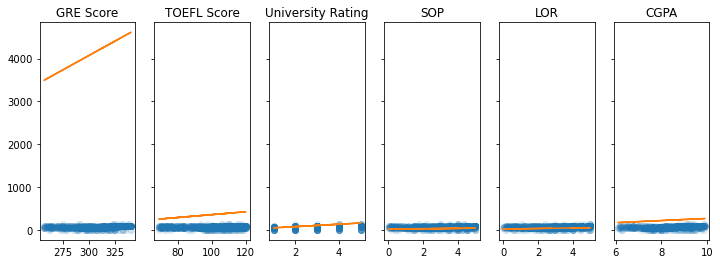

In [21]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)


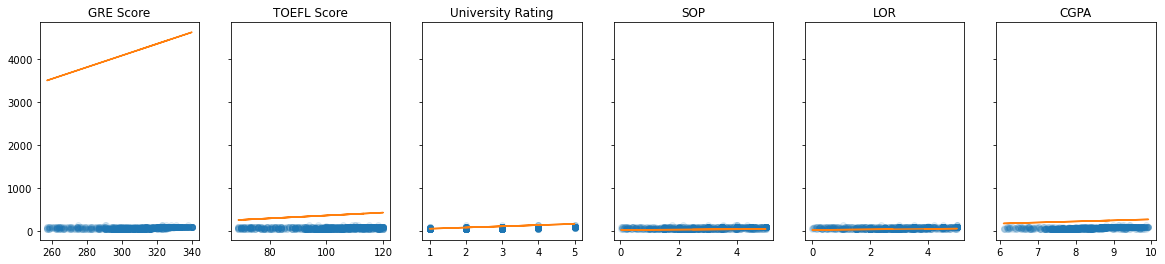

In [22]:
f, axs = plt.subplots(1, len(features), sharey = True, figsize = (20, 4))

for i in range(len(features)):
    col = features[i]
    x = data[col]
    m = pipeline['model'].coef_[i]
    b = pipeline['model'].intercept_

    axs[i].plot(x, data[obj], 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)


In [25]:
data[obj].describe()

count    1502.000000
mean       66.642457
std        19.061924
min        34.000000
25%        48.000000
50%        67.000000
75%        84.000000
max       138.000000
Name: Admission Points, dtype: float64

In [26]:
pd.DataFrame({ 'columns': features, 'coef': pipeline['model'].coef_})

,columns,coef
0,GRE Score,13.517031
1,TOEFL Score,3.357533
2,University Rating,27.994901
3,SOP,3.659870
4,LOR,6.146590
5,CGPA,24.663360


In [27]:
dump(pipeline, 'elPipeline.joblib')

['elPipeline.joblib']

## Coeficientes

In [28]:
pd.DataFrame({'columns':features, 'coef':pipeline['model'].coef_})

,columns,coef
0,GRE Score,13.517031
1,TOEFL Score,3.357533
2,University Rating,27.994901
3,SOP,3.659870
4,LOR,6.146590
5,CGPA,24.663360


### Colinealidad

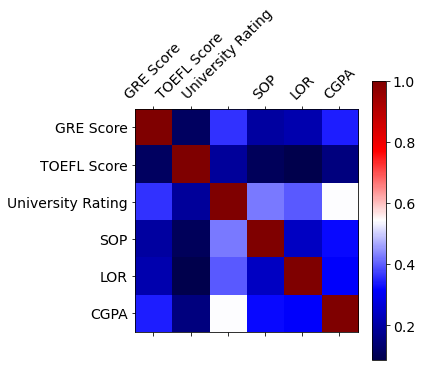

In [29]:
df_temp = data[features]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Como se puede observar por el grafico, ninguna de las columnas tiene mayor colinealidad entre ellas, que es uno de los supuestos de la regresion lineal

### Linealidad

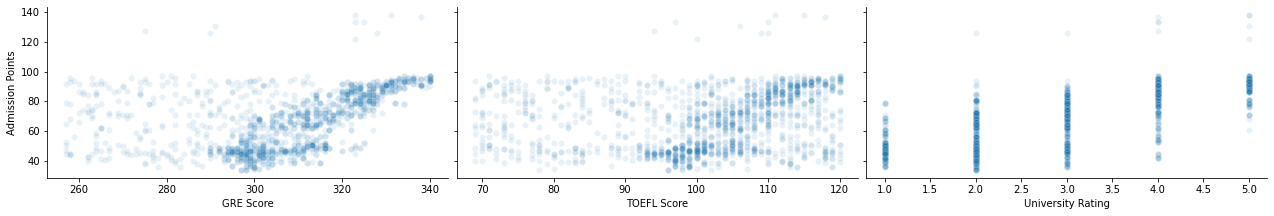

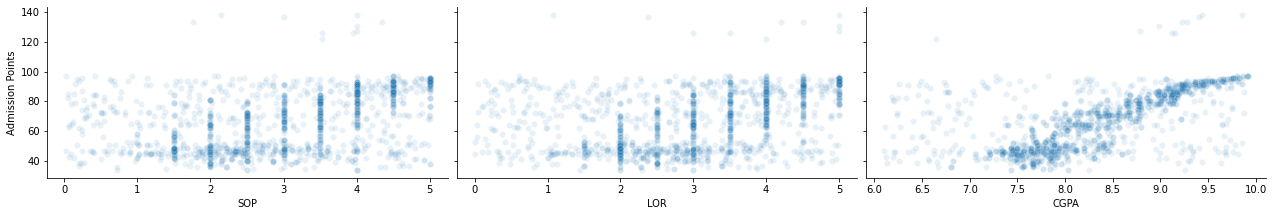

In [30]:
sns.pairplot(data , height=3, aspect = 2, y_vars = obj, 
             x_vars = features[0:3], kind='scatter', plot_kws = {'alpha':0.1})
sns.pairplot(data , height=3, aspect = 2, y_vars = obj, 
             x_vars = features[3:], kind='scatter', plot_kws = {'alpha':0.1})